In [18]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Model, Sequential
from tensorflow.keras.layers import *
from keras.src.backend import Variable
import tensorflow as tf

In [19]:
# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize data and flatten images
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))

# Verification subset
X_subset = x_train[:1000]
y_subset = y_train[:1000]



In [20]:
X_ordered = X_subset[np.argsort(y_subset)]
y_ordered = y_subset[np.argsort(y_subset)]

<Axes: >

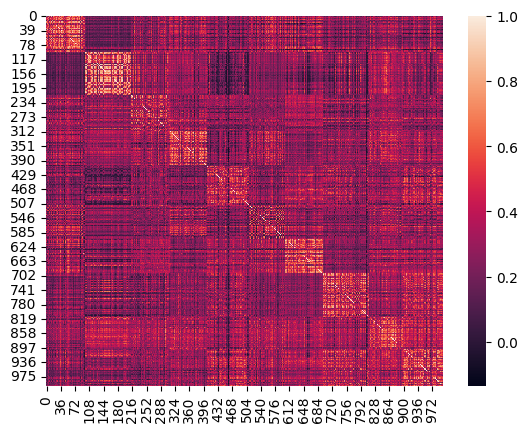

In [21]:
import seaborn as sns

sns.heatmap(np.corrcoef(X_ordered))

In [39]:
# Calculate the pairwise distances matrix from scratch
def euclid_distances(X):
    # Efficient vectorized calculation
    sum_square = np.sum(X**2, axis=1)
    distances = np.sqrt(sum_square[:, np.newaxis] + sum_square - 2 * np.dot(X, X.T))
    return distances


In [40]:

distances = euclid_distances(X_ordered)


/tmp/ipykernel_5702/4021053402.py:5: RuntimeWarning: invalid value encountered in sqrt
  distances = np.sqrt(sum_square[:, np.newaxis] + sum_square - 2 * np.dot(X, X.T))


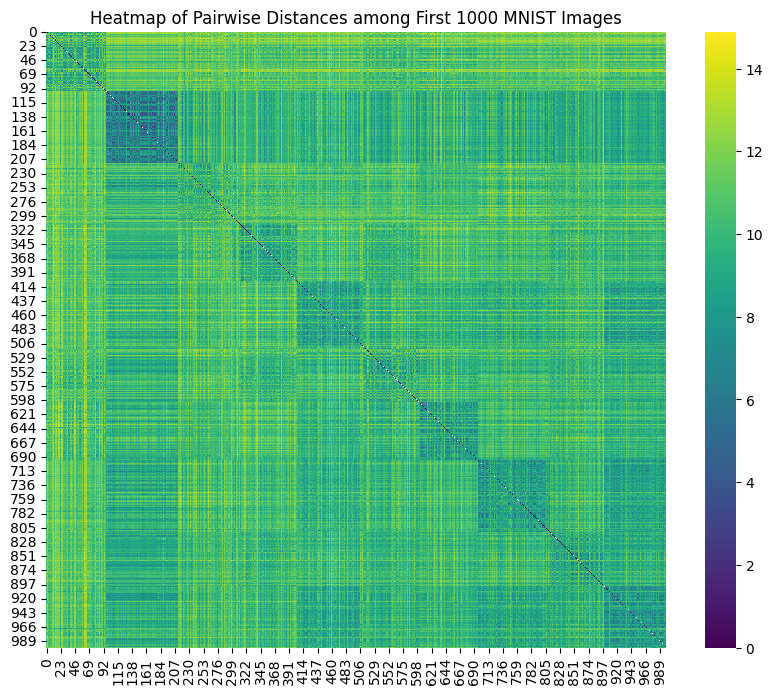

In [41]:

# Plot heatmap of the pairwise distances matrix
plt.figure(figsize=(10, 8))
sns.heatmap(distances, cmap='viridis')
plt.title('Heatmap of Pairwise Distances among First 1000 MNIST Images')
plt.show()

# domowe tSNE

In [25]:
# def correlation(matrix):
#     # same as numpy.corrcoef but for tensorflow
#     means = tf.reduce_mean(matrix, axis=1, keepdims=True)
#     diff = matrix - means
#     dot_products = tf.matmul(diff, diff, transpose_b=True)
#     norms = tf.norm(diff, axis=1, keepdims=True)
#     return dot_products / tf.matmul(norms, norms, transpose_b=True)

# def correlation_loss(X, Y):
#     return tf.reduce_mean((correlation(X) - correlation(Y))**2)

In [42]:
# Calculate the pairwise distances matrix from scratch
def euclid_distances(X):
    # Efficient vectorized calculation
    sum_square = np.sum(np.square(X), axis=1)
    distances = np.sqrt(sum_square[:, np.newaxis] + sum_square - 2 * np.dot(X, X.T))
    return distances

def euclid_loss(X, Y):
    return ((euclid_distances(X) - euclid_distances(Y))**2).mean()

In [43]:
latent_dim = 20
model = Sequential([
    Input(shape=(784,)),
    Reshape((28, 28, 1)),
    Conv2D(32, kernel_size=(3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(latent_dim, activation="tanh"),
])

model.compile(optimizer="adam", loss=euclid_loss)
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_6 (Reshape)             │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 20)             │        32,020 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,836 (198.58 KB)

 Trainable params: 50,836 (198.58 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
type(X_ordered)

numpy.ndarray

In [45]:
history = model.fit(X_ordered, X_ordered, epochs=50, batch_size=256, shuffle=True, validation_data=(X_ordered, X_ordered))

Epoch 1/50


NotImplementedError: Cannot convert a symbolic tf.Tensor (compile_loss/euclid_loss/pow:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported.